In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Ex. 8

In [2]:
dataset_file = '../datasets/Auto.csv'
data = pd.read_csv(dataset_file, index_col='name')
data = data.loc[data.horsepower != '?']
data.horsepower = data.horsepower.apply(int)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
import statsmodels.api as sm

In [4]:
model = sm.OLS(data.mpg, sm.add_constant(data.horsepower)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           7.03e-81
Time:                        09:41:56   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
model.get_prediction([1, 98]).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


Small p-value shows that there is definetely a relationship between `mpg` and `horsepower` variables. R squared shows that 60.6 % of variability in `mpg` is explained by `horsepower`, and negative coeficient for `horsepower` shows that relationship is negative.

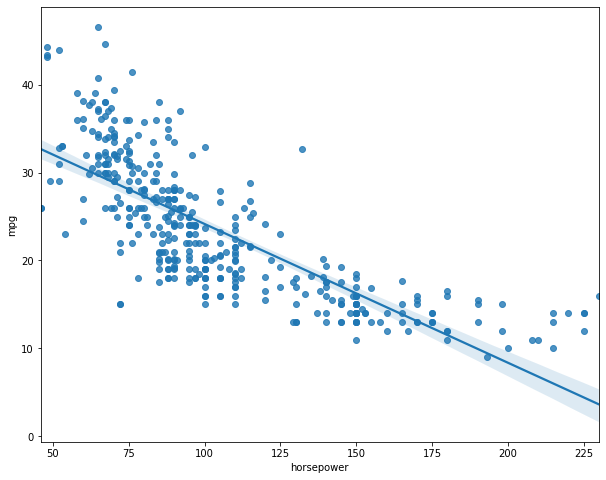

In [6]:
plt.figure(figsize=(10, 8))
sns.regplot(data.horsepower, data.mpg)

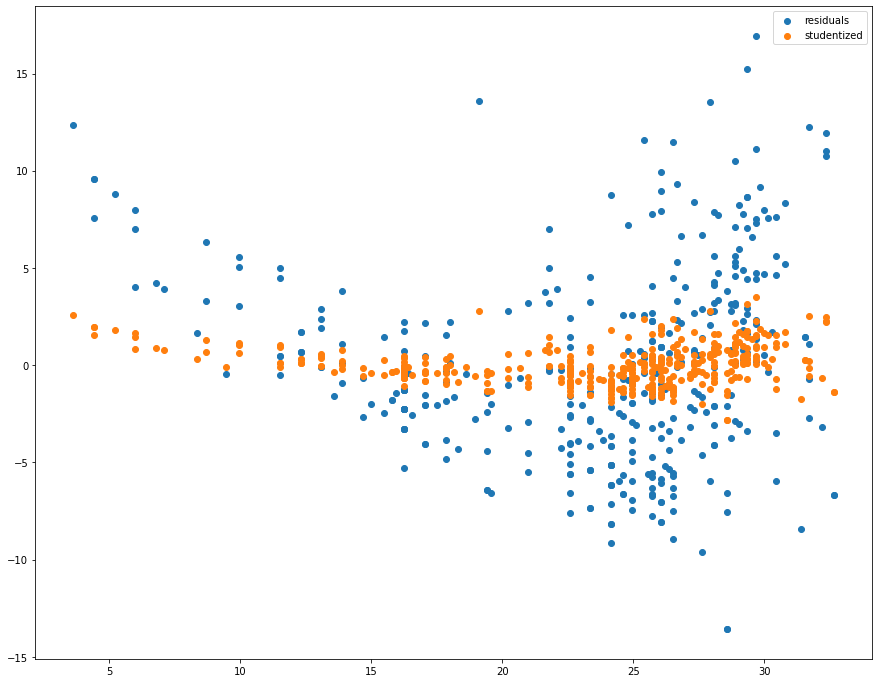

In [7]:
plt.figure(figsize=(15, 12))
predictions = model.predict(sm.add_constant(data.horsepower))
residuals = data.mpg - predictions
plt.scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
plt.scatter(predictions, studentized, label='studentized')
plt.legend()

In [8]:
log_term = np.log(data.horsepower)
log_term.name = 'horsepower_2'
log_X = pd.concat([data.horsepower, log_term], axis=1)
log_model = sm.OLS(data.mpg, sm.add_constant(log_X)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     416.6
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           1.98e-97
Time:                        09:41:57   Log-Likelihood:                -1136.8
No. Observations:                 392   AIC:                             2280.
Df Residuals:                     389   BIC:                             2292.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          156.0406     12.083     12.914      0.000     132.285     179.796
horsepower       0.1185      0.029      4.044      0.000       0.061       0.176
horsepower_2   -31.5982      3.284     -9.623      0.000     -38.054     -25.142
==============================================================================
Omnibus:                       17.484   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.245
Skew:                           0.162   Prob(JB):                     3.01e-09
Kurtosis:                       4.516   Cond. No.                     6.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
squared_term = data.horsepower ** 2
squared_term.name = 'horsepower^2'
squared_X = pd.concat([data.horsepower, squared_term], axis=1)
squared_model = sm.OLS(data.mpg, sm.add_constant(squared_X)).fit()
squared_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           5.40e-99
Time:                        09:41:57   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           56.9001      1.800     31.604      0.000      53.360      60.440
horsepower      -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower^2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ex. 9

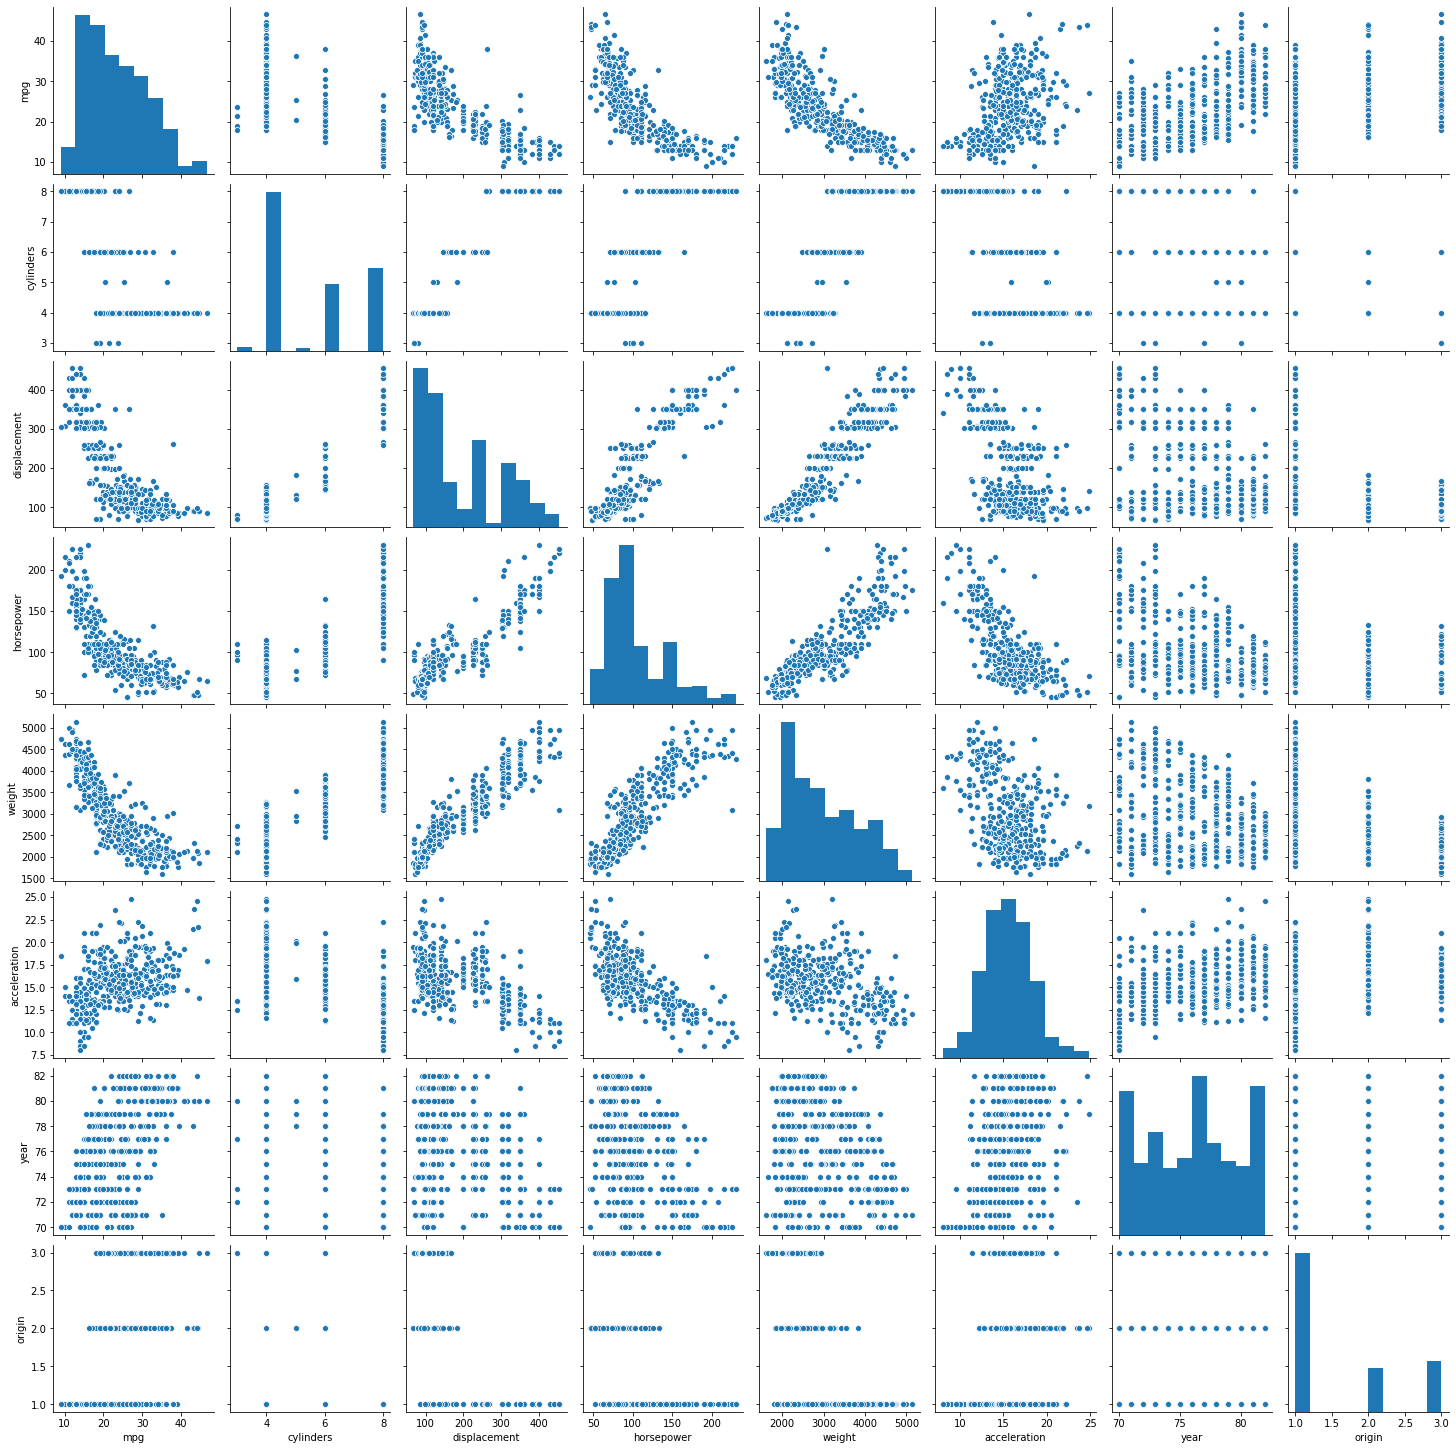

In [10]:
sns.pairplot(data=data)

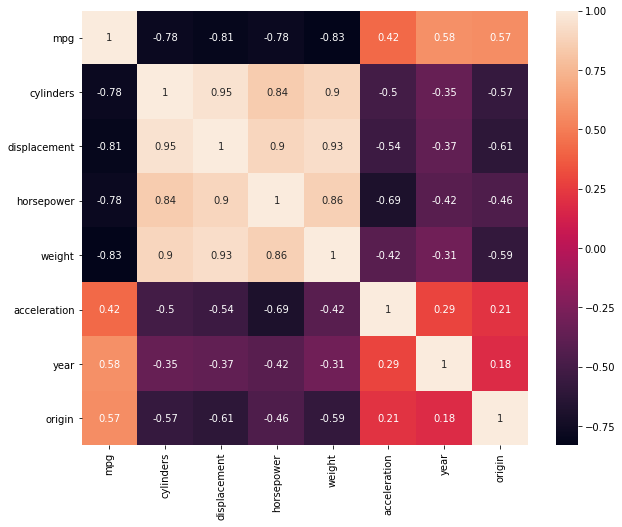

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)

In [12]:
cyl_dummies = pd.get_dummies(data.cylinders).drop([8], axis=1)
cyl_dummies.columns = ['cyl_3', 'cyl_4', 'cyl_5', 'cyl_6']
origin_dummies = pd.get_dummies(data.origin).drop([3], axis=1)
origin_dummies.columns = ['origin_1', 'origin_2']
data_with_dummies = pd.concat([data.drop(['mpg', 'cylinders', 'origin'], axis=1), cyl_dummies, origin_dummies], axis=1)
data_with_dummies.head()

,displacement,horsepower,weight,acceleration,year,cyl_3,cyl_4,cyl_5,cyl_6,origin_1,origin_2
name,,,,,,,,,,,
chevrolet chevelle malibu,307.0,130,3504,12.0,70,0,0,0,0,1,0
buick skylark 320,350.0,165,3693,11.5,70,0,0,0,0,1,0
plymouth satellite,318.0,150,3436,11.0,70,0,0,0,0,1,0
amc rebel sst,304.0,150,3433,12.0,70,0,0,0,0,1,0
ford torino,302.0,140,3449,10.5,70,0,0,0,0,1,0


In [13]:
multi_model = sm.OLS(data.mpg, sm.add_constant(data.drop(['mpg'], axis=1))).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          2.04e-139
Time:                        09:42:09   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
multi_model_2 = sm.OLS(data.mpg, sm.add_constant(data_with_dummies)).fit()
multi_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     191.1
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          2.39e-147
Time:                        09:42:09   Log-Likelihood:                -993.35
No. Observations:                 392   AIC:                             2011.
Df Residuals:                     380   BIC:                             2058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.3637      4.631     -3.102      0.002     -23.469      -5.258
displacement     0.0187      0.007      2.590      0.010       0.005       0.033
horsepower      -0.0349      0.013     -2.639      0.009      -0.061      -0.009
weight          -0.0058      0.001     -9.154      0.000      -0.007      -0.005
acceleration     0.0260      0.093      0.279      0.780      -0.157       0.209
year             0.7370      0.049     15.064      0.000       0.641       0.833
cyl_3           -5.0992      2.109     -2.418      0.016      -9.246      -0.953
cyl_4            1.6226      1.228      1.322      0.187      -0.792       4.037
cyl_5            1.9792      2.105      0.940      0.348      -2.160       6.118
cyl_6           -1.7480      0.797     -2.193      0.029      -3.315      -0.181
origin_1        -2.6172      0.527     -4.964      0.000      -3.654      -1.581
origin_2        -0.8532      0.546     -1.564      0.119      -1.926       0.220
==============================================================================
Omnibus:                       45.781   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.634
Skew:                           0.677   Prob(JB):                     2.54e-19
Kurtosis:                       4.846   Cond. No.                     9.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Model 2')

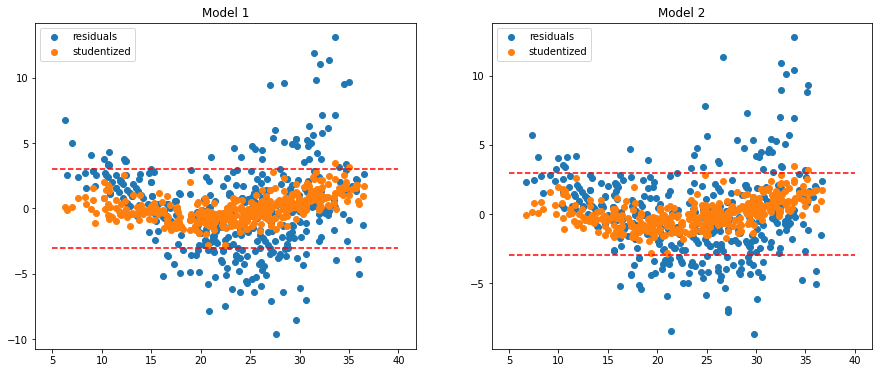

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
line = np.linspace(5, 40, 50)

predictions = multi_model.predict(sm.add_constant(data.drop(['mpg'], axis=1)))
residuals = data.mpg - predictions
axes[0].scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
axes[0].scatter(predictions, studentized, label='studentized')
axes[0].legend()
axes[0].plot(line, np.full(line.shape, 3), 'r--')
axes[0].plot(line, np.full(line.shape, -3), 'r--')
axes[0].set_title('Model 1')

predictions = multi_model_2.predict(sm.add_constant(data_with_dummies))
residuals = data.mpg - predictions
axes[1].scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
axes[1].scatter(predictions, studentized, label='studentized')
axes[1].legend()
axes[1].plot(line, np.full(line.shape, 3), 'r--')
axes[1].plot(line, np.full(line.shape, -3), 'r--')
axes[1].set_title('Model 2')

F-statistic is far from 1, which means that there is a relationship between predictors and response. P-values show that `displacement`, `weight`, `year` and `origin` have relationship to `mpg`, but `cylinders`, `horsepower` and `acceleration` do not. `year` coeffitient shows for how much `mpg` increases with each year.

13

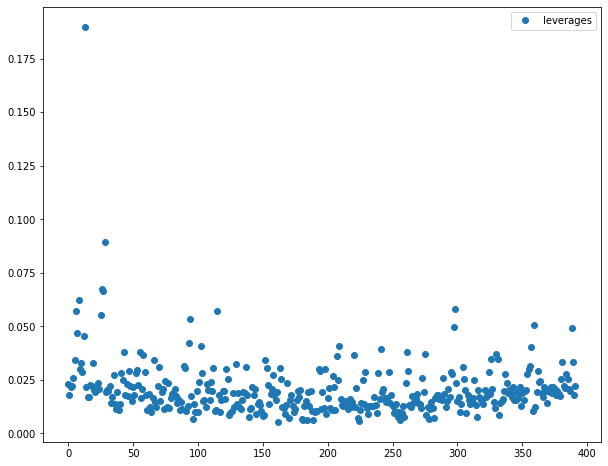

In [16]:
plt.figure(figsize=(10, 8))
hat_values = multi_model.get_influence().hat_matrix_diag
plt.plot(hat_values, 'o', label='leverages')
plt.legend()
hat_values.argmax()

In [17]:
print(residuals[13])
residuals.describe()

-3.6859154442224167


count    3.920000e+02
mean     1.053126e-13
std      3.053786e+00
min     -8.679687e+00
25%     -1.937324e+00
50%     -6.777841e-02
75%      1.671145e+00
max      1.277558e+01
dtype: float64

Residual plot shows some pattern in residuals, which tells us that data is non-linear. Also there is some outliers (studentized values > 3) at residual plot. Leverages plot show one significant point with high leverage

In [18]:
data_with_dummies.columns

Index(['displacement', 'horsepower', 'weight', 'acceleration', 'year', 'cyl_3',
       'cyl_4', 'cyl_5', 'cyl_6', 'origin_1', 'origin_2'],
      dtype='object')

In [19]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [20]:
inter_terms = {}
cols = data_with_dummies.columns
for i in range(len(cols) - 1):
    for j in range(i + 1, len(cols)):
        inter_terms[f'{cols[i]}x{cols[j]}'] = data_with_dummies[cols[i]] * data_with_dummies[cols[j]]
to_delete = [key for key in inter_terms.keys() if key.split('x')[0][:3] == key.split('x')[1][:3]]
for key in to_delete:
    del inter_terms[key]
inter_terms.keys()

dict_keys(['displacementxhorsepower', 'displacementxweight', 'displacementxacceleration', 'displacementxyear', 'displacementxcyl_3', 'displacementxcyl_4', 'displacementxcyl_5', 'displacementxcyl_6', 'displacementxorigin_1', 'displacementxorigin_2', 'horsepowerxweight', 'horsepowerxacceleration', 'horsepowerxyear', 'horsepowerxcyl_3', 'horsepowerxcyl_4', 'horsepowerxcyl_5', 'horsepowerxcyl_6', 'horsepowerxorigin_1', 'horsepowerxorigin_2', 'weightxacceleration', 'weightxyear', 'weightxcyl_3', 'weightxcyl_4', 'weightxcyl_5', 'weightxcyl_6', 'weightxorigin_1', 'weightxorigin_2', 'accelerationxyear', 'accelerationxcyl_3', 'accelerationxcyl_4', 'accelerationxcyl_5', 'accelerationxcyl_6', 'accelerationxorigin_1', 'accelerationxorigin_2', 'yearxcyl_3', 'yearxcyl_4', 'yearxcyl_5', 'yearxcyl_6', 'yearxorigin_1', 'yearxorigin_2', 'cyl_3xorigin_1', 'cyl_3xorigin_2', 'cyl_4xorigin_1', 'cyl_4xorigin_2', 'cyl_5xorigin_1', 'cyl_5xorigin_2', 'cyl_6xorigin_1', 'cyl_6xorigin_2'])

In [21]:
interterm_data_with_free_terms = {}
cols = data.drop(['mpg'], axis=1).columns.tolist()
cols.insert(-1, cols.pop(0))
print(cols)
for i in range(len(cols) - 1):
    for j in range(i + 1, len(cols)):
        left_cols = list(set([key.split('x')[0] for key in inter_terms.keys() if key.split('x')[0].startswith(cols[i][:3])]))
        right_cols = list(set([key.split('x')[1] for key in inter_terms.keys() if key.split('x')[1].startswith(cols[j][:3])]))
        pairs = sorted([f'{left}x{right}' for left in left_cols for right in right_cols])
        print(pairs)
        temp = pd.concat([inter_terms[key] for key in pairs], axis=1)
        temp.columns = pairs
        temp = pd.concat([data_with_dummies.loc[:, left_cols + right_cols], temp], axis=1)
        interterm_data_with_free_terms[f'{cols[i]}x{cols[j]}'] = temp

interterm_data_with_free_terms.keys()

['displacement', 'horsepower', 'weight', 'acceleration', 'year', 'cylinders', 'origin']
['displacementxhorsepower']
['displacementxweight']
['displacementxacceleration']
['displacementxyear']
['displacementxcyl_3', 'displacementxcyl_4', 'displacementxcyl_5', 'displacementxcyl_6']
['displacementxorigin_1', 'displacementxorigin_2']
['horsepowerxweight']
['horsepowerxacceleration']
['horsepowerxyear']
['horsepowerxcyl_3', 'horsepowerxcyl_4', 'horsepowerxcyl_5', 'horsepowerxcyl_6']
['horsepowerxorigin_1', 'horsepowerxorigin_2']
['weightxacceleration']
['weightxyear']
['weightxcyl_3', 'weightxcyl_4', 'weightxcyl_5', 'weightxcyl_6']
['weightxorigin_1', 'weightxorigin_2']
['accelerationxyear']
['accelerationxcyl_3', 'accelerationxcyl_4', 'accelerationxcyl_5', 'accelerationxcyl_6']
['accelerationxorigin_1', 'accelerationxorigin_2']
['yearxcyl_3', 'yearxcyl_4', 'yearxcyl_5', 'yearxcyl_6']
['yearxorigin_1', 'yearxorigin_2']
['cyl_3xorigin_1', 'cyl_3xorigin_2', 'cyl_4xorigin_1', 'cyl_4xorigin_2',

dict_keys(['displacementxhorsepower', 'displacementxweight', 'displacementxacceleration', 'displacementxyear', 'displacementxcylinders', 'displacementxorigin', 'horsepowerxweight', 'horsepowerxacceleration', 'horsepowerxyear', 'horsepowerxcylinders', 'horsepowerxorigin', 'weightxacceleration', 'weightxyear', 'weightxcylinders', 'weightxorigin', 'accelerationxyear', 'accelerationxcylinders', 'accelerationxorigin', 'yearxcylinders', 'yearxorigin', 'cylindersxorigin'])

In [22]:
interterm_data_with_free_terms['accelerationxorigin'].head()

,acceleration,origin_2,origin_1,accelerationxorigin_1,accelerationxorigin_2
name,,,,,
chevrolet chevelle malibu,12.0,0,1,12.0,0.0
buick skylark 320,11.5,0,1,11.5,0.0
plymouth satellite,11.0,0,1,11.0,0.0
amc rebel sst,12.0,0,1,12.0,0.0
ford torino,10.5,0,1,10.5,0.0


In [24]:
for key in interterm_data_with_free_terms.keys():
    model = sm.OLS(data.mpg, sm.add_constant(interterm_data_with_free_terms[key])).fit()
    print(key)
    print(model.rsquared)
    print(model.fvalue)
    print(model.f_pvalue)
    print()

displacementxhorsepower
0.7465843639484142
381.02717696685187
3.004637181863526e-115

displacementxweight
0.7265268201240589
343.59543208345934
7.757075520538667e-109

displacementxacceleration
0.6765604699715367
270.53533244772245
1.0297683549089045e-94

displacementxyear
0.7735262918753038
441.74105055109743
1.035639560158252e-124

displacementxcylinders
0.7184355244337232
108.3005824595392
2.0211140430003295e-99

displacementxorigin
0.6740232352721356
159.62669549913767
1.2547645134778726e-91

horsepowerxweight
0.7484351450253209
384.7819366488398
7.256690373224504e-116

horsepowerxacceleration
0.680871043970277
275.9364828010807
7.650546199652459e-96

horsepowerxyear
0.7521682867976963
392.52616423532226
4.000851844384961e-117

horsepowerxcylinders
0.7514657154438217
128.33458718992298
1.0540065243982869e-109

horsepowerxorigin
0.6831311364757822
166.4339094393215
5.394776751645586e-94

weightxacceleration
0.705961712864374
310.5186825154666
9.826551884304642e-103

weightxyear
0.83

`weight` and `year` interaction have the best R-squared value. It appears that all interactions have predictive power. 

In [25]:
data_with_log_terms = {}
data_with_root_terms = {}
data_with_squared_terms = {}
cols = data.drop(['mpg', 'cylinders', 'origin'], axis=1)

for col in cols:
    data_with_log_terms[col] = pd.concat([data[col], np.log(data[col])], axis=1)
    data_with_root_terms[col] = pd.concat([data[col], np.sqrt(data[col])], axis=1)
    data_with_squared_terms[col] = pd.concat([data[col], data[col] ** 2], axis=1)

In [26]:
for key in data_with_log_terms.keys():
    model = sm.OLS(data.mpg, sm.add_constant(data_with_log_terms[key])).fit()
    print(key)
    print(model.rsquared)
    print(model.pvalues)
    print()

displacement
0.6873139696820081
const           6.792298e-25
displacement    2.704292e-01
displacement    1.338006e-11
dtype: float64

horsepower
0.6817155385106664
const         5.330637e-32
horsepower    6.338418e-05
horsepower    8.368921e-20
dtype: float64

weight
0.7140020031669523
const     1.992006e-10
weight    1.779718e-01
weight    1.214480e-07
dtype: float64

acceleration
0.19371999969097742
const           0.015132
acceleration    0.181683
acceleration    0.008472
dtype: float64

year
0.36782160831346633
const    0.000023
year     0.000004
year     0.000017
dtype: float64



In [27]:
for key in data_with_root_terms.keys():
    model = sm.OLS(data.mpg, sm.add_constant(data_with_root_terms[key])).fit()
    print(key)
    print(model.rsquared)
    print(model.pvalues)
    print()

displacement
0.6887943896457622
const           1.969300e-43
displacement    3.116516e-05
displacement    5.222059e-12
dtype: float64

horsepower
0.6850316751171257
const         5.526026e-44
horsepower    4.487041e-12
horsepower    1.068818e-20
dtype: float64

weight
0.7144766368935089
const     3.583719e-19
weight    6.306404e-04
weight    8.702008e-08
dtype: float64

acceleration
0.1941043651581107
const           0.012526
acceleration    0.042029
acceleration    0.007640
dtype: float64

year
0.3677551507077431
const    0.000029
year     0.000009
year     0.000018
dtype: float64



In [28]:
for key in data_with_squared_terms.keys():
    model = sm.OLS(data.mpg, sm.add_constant(data_with_squared_terms[key])).fit()
    print(key)
    print(model.rsquared)
    print(model.pvalues)
    print()

displacement
0.688808733323848
const           1.589533e-136
displacement     6.129518e-30
displacement     5.174575e-12
dtype: float64

horsepower
0.6875590305127515
const         1.740911e-109
horsepower     2.289429e-40
horsepower     2.196340e-21
dtype: float64

weight
0.7151475557845139
const     3.848779e-65
weight    5.609944e-19
weight    5.429177e-08
dtype: float64

acceleration
0.19396401103217598
const           0.051095
acceleration    0.000131
acceleration    0.007934
dtype: float64

year
0.36752584086301265
const    0.000138
year     0.000072
year     0.000019
dtype: float64



Models with non-linear `weight` predictor have highest R-squared values, although they don't give big improvement of original.

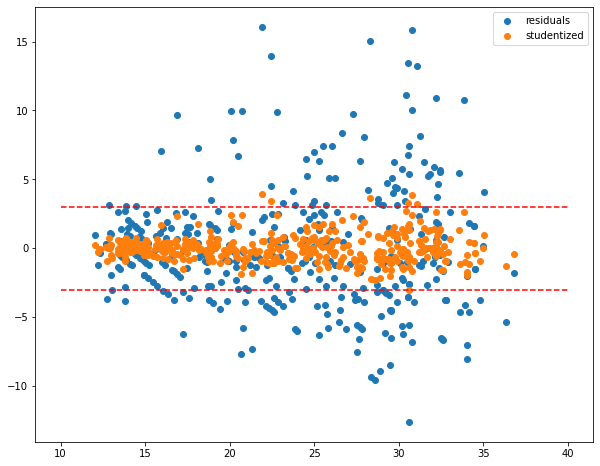

In [29]:
plt.figure(figsize=(10, 8))
line = np.linspace(10, 40, 50)

model = sm.OLS(data.mpg, sm.add_constant(data_with_squared_terms['weight'])).fit()
predictions = model.predict(sm.add_constant(data_with_squared_terms['weight']))
residuals = data.mpg - predictions
plt.scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
plt.scatter(predictions, studentized, label='studentized')
plt.legend()
plt.plot(line, np.full(line.shape, 3), 'r--')
plt.plot(line, np.full(line.shape, -3), 'r--')

In [30]:
data_with_best = pd.concat([
    data_with_dummies,
    data.weight ** 2,
    data.weight * data.year
], axis=1)
data_with_best.columns = ['displacement', 'horsepower', 'weight', 'acceleration', 'year', 'cyl_3', 'cyl_4', 'cyl_5', 'cyl_6', 'origin_1', 'origin_2', 'weight^2', 'weightxyear']
data_with_best.head()

,displacement,horsepower,weight,acceleration,year,cyl_3,cyl_4,cyl_5,cyl_6,origin_1,origin_2,weight^2,weightxyear
name,,,,,,,,,,,,,
chevrolet chevelle malibu,307.0,130,3504,12.0,70,0,0,0,0,1,0,12278016,245280
buick skylark 320,350.0,165,3693,11.5,70,0,0,0,0,1,0,13638249,258510
plymouth satellite,318.0,150,3436,11.0,70,0,0,0,0,1,0,11806096,240520
amc rebel sst,304.0,150,3433,12.0,70,0,0,0,0,1,0,11785489,240310
ford torino,302.0,140,3449,10.5,70,0,0,0,0,1,0,11895601,241430


In [31]:
best_model = sm.OLS(data.mpg, sm.add_constant(data_with_best)).fit()
print(best_model.rsquared)
print(best_model.pvalues)
print()

0.8750902507116047
const           1.555106e-06
displacement    5.088978e-02
horsepower      2.794595e-03
weight          1.171058e-01
acceleration    4.446400e-01
year            1.868565e-19
cyl_3           1.180248e-02
cyl_4           5.737839e-01
cyl_5           1.669502e-01
cyl_6           3.392792e-01
origin_1        9.932181e-04
origin_2        9.720360e-01
weight^2        2.661017e-07
weightxyear     4.737128e-07
dtype: float64



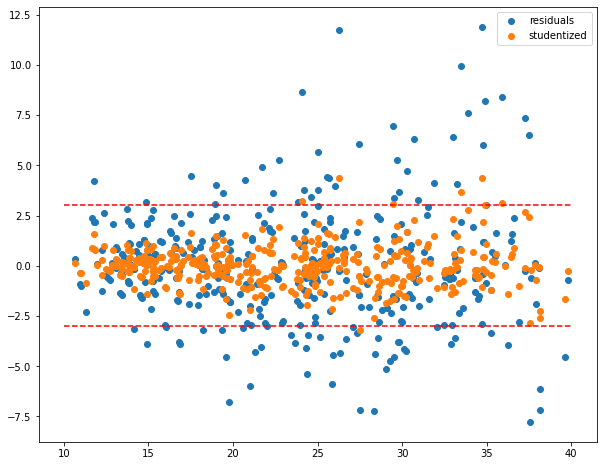

In [32]:
plt.figure(figsize=(10, 8))
line = np.linspace(10, 40, 50)

model = sm.OLS(data.mpg, sm.add_constant(data_with_best)).fit()
predictions = model.predict(sm.add_constant(data_with_best))
residuals = data.mpg - predictions
plt.scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
plt.scatter(predictions, studentized, label='studentized')
plt.legend()
plt.plot(line, np.full(line.shape, 3), 'r--')
plt.plot(line, np.full(line.shape, -3), 'r--')

# Ex. 10

In [33]:
dataset_file = '../datasets/Carseats.csv'
data = pd.read_csv(dataset_file)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [34]:
data.loc[data.isna().any(axis=1)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [35]:
shelveloc_dummies = pd.get_dummies(data.ShelveLoc).drop(['Medium'], axis=1)
urban_dummies = pd.get_dummies(data.Urban).drop(['No'], axis=1)
us_dummies = pd.get_dummies(data.US).drop(['No'], axis=1)
shelveloc_dummies.columns = ['ShelveLocBad', 'ShelveLocGood']
urban_dummies.columns = ['Urban']
us_dummies.columns = ['US']

data_y = data.Sales
data_X = pd.concat([
    data.drop(['Sales', 'ShelveLoc', 'Urban', 'US'], axis=1),
    shelveloc_dummies,
    urban_dummies,
    us_dummies
], axis=1)
data_X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLocBad,ShelveLocGood,Urban,US
0,138,73,11,276,120,42,17,1,0,1,1
1,111,48,16,260,83,65,10,0,1,1,1
2,113,35,10,269,80,59,12,0,0,1,1
3,117,100,4,466,97,55,14,0,0,1,1
4,141,64,3,340,128,38,13,1,0,1,0


In [36]:
sales_on_price_urban_us = sm.OLS(data_y, sm.add_constant(data_X.loc[:, ['Price', 'Urban', 'US']])).fit()
sales_on_price_urban_us.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           2.39e-23
Time:                        09:42:40   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model coeficients show that `Sales` have an intercept of 13.0435. Variable `Price` is in negative relationship with `Sales`, with each 1-unit increase in `Price`, `Sales` go down with approximately 0.05 units. `Urban` also has negative relationship. Considering that `Urban` is qualitative variable, if `Urban` set to true, `Sales` go down with approximately 0.02 units. But t-test for `Urban` variable results in a big p-value, which points on insignificance. `US` variable has positive relation to `Sales`. If `US` set to true, `Sales` increases by 1.2 units.

`Sales = 13.0435 - 0.0545 * Price - [0.0219 if Urban is True] + [1.2006 if US is True]`

In [37]:
sales_on_price_us = sm.OLS(data_y, sm.add_constant(data_X.loc[:, ['Price', 'US']])).fit()
sales_on_price_us.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           2.66e-24
Time:                        09:42:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing insignificant variable doesn't result in model performance change. It only results in F-score increase.

In [38]:
sales_on_price_us.conf_int()

,0,1
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


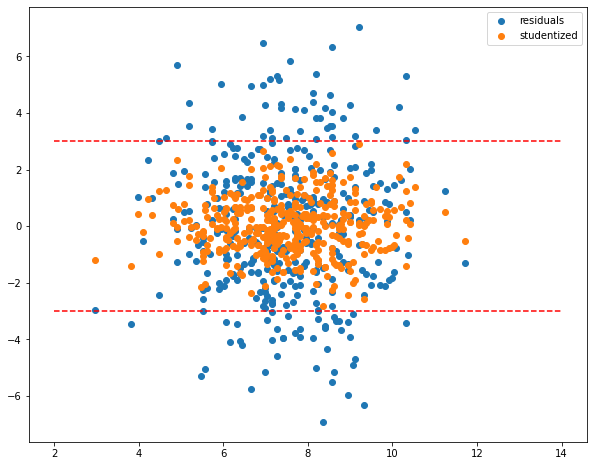

In [39]:
plt.figure(figsize=(10, 8))
line = np.linspace(2, 14, 50)

predictions = sales_on_price_us.predict(sm.add_constant(sm.add_constant(data_X.loc[:, ['Price', 'US']])))
residuals = data_y - predictions
plt.scatter(predictions, residuals, label='residuals')
studentized = sales_on_price_us.get_influence().resid_studentized_external
plt.scatter(predictions, studentized, label='studentized')
plt.legend()
plt.plot(line, np.full(line.shape, 3), 'r--')
plt.plot(line, np.full(line.shape, -3), 'r--')

42

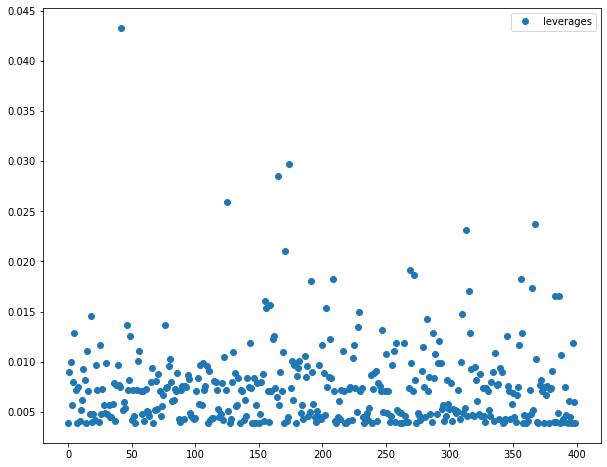

In [40]:
plt.figure(figsize=(10, 8))
hat_values = sales_on_price_us.get_influence().hat_matrix_diag
plt.plot(hat_values, 'o', label='leverages')
plt.legend()
hat_values.argmax()

In [41]:
residuals[42]

-1.2933295751008806

In [42]:
residuals.describe()

count    4.000000e+02
mean    -1.611156e-14
std      2.463200e+00
min     -6.926851e+00
25%     -1.628643e+00
50%     -5.740294e-02
75%      1.576635e+00
max      7.051506e+00
dtype: float64

Plot for residuals shows no anomalies. Point with highest leverage does not relate to significant residual.

# Ex. 11

In [49]:
np.random.seed(1)
X = np.random.normal(size=100)
y = 2 * X + np.random.normal(size=100)

In [50]:
simple_model_yonx = sm.OLS(y, X).fit()
simple_model_yonx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                    3.46e-36
Time:                        09:55:48   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coeficient is very close to real value of beta. Standard error is low. T-value and associated p-value shows that we can deny null-hypothesis.

In [46]:
simple_model_xony = sm.OLS(X, y).fit()
simple_model_xony.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                    3.46e-36
Time:                        09:53:46   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coeficient is very close to real value of beta, but it farther from real value than in previous experiment. Standard error is low. T-value and associated p-value shows that we can deny null-hypothesis.

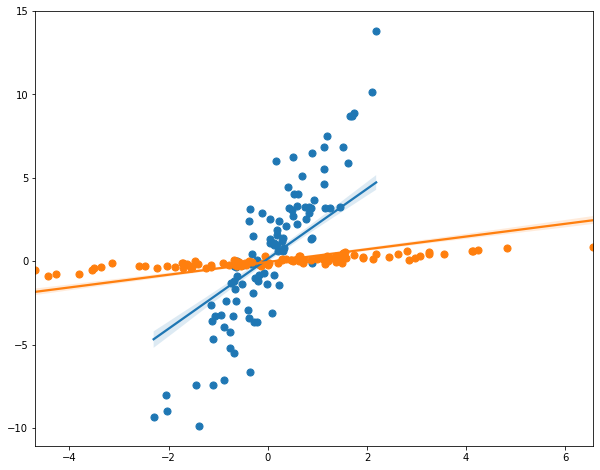

In [56]:
plt.figure(figsize=(10, 8))
sns.regplot(X, y, x_estimator=simple_model_yonx.predict)
sns.regplot(y, X, x_estimator=simple_model_xony.predict)

In [57]:
def t(x, y):
    return (np.sqrt(len(x) - 1) * np.dot(x, y.T)) / np.sqrt(np.dot(x, x.T) * np.dot(y, y.T) - np.dot(x, y.T) ** 2)

In [59]:
t(X, y), t(y, X)

(19.791801987091205, 19.791801987091205)

Because multiplication of vectors is commutative, it doesn't matter if X or y is first.

In [66]:
simple_model_with_interept = sm.OLS(y, sm.add_constant(X)).fit()
print(f'Without intercept: {simple_model_yonx.tvalues[0]}')
print(f'With intercept   : {simple_model_with_interept.tvalues[1]}')
print(f'Difference       : {simple_model_with_interept.tvalues[1] - simple_model_yonx.tvalues[0]}')

Without intercept: 19.7918019870912
With intercept   : 19.782585315629255
Difference       : -0.009216671461945936


# Ex. 12

Formula for regression coefficient shows that coeficients for regression of y onto x and x onto y are equal when sum of squares of x and sum of squares of y are equal.

In [69]:
np.random.seed(1)
X = np.random.normal(size=100)
y = 2 * X + np.random.normal(size=100)

simple_model_yonx = sm.OLS(y, X).fit()

simple_model_xony = sm.OLS(X, y).fit()

simple_model_yonx.params[0], simple_model_xony.params[0]

(2.1067416889591146, 0.3789044229072016)

y = b * x  
y^2 = b^2 * x^2  
sum(y^2) = sum(b^2 * x^2)  
sum(y^2) = b^2 * sum(x^2)  
b^2 = 1  
b = +-1  

In [71]:
np.random.seed(1)
X = np.random.normal(size=100) * 10
y = 1 * X + np.random.normal(size=100)

simple_model_yonx = sm.OLS(y, X).fit()

simple_model_xony = sm.OLS(X, y).fit()

simple_model_yonx.params[0], simple_model_xony.params[0]

(1.0106741688959122, 0.9786909937563232)

In [72]:
np.random.seed(1)
X = np.random.normal(size=100) * 10
y = - 1 * X + np.random.normal(size=100)

simple_model_yonx = sm.OLS(y, X).fit()

simple_model_xony = sm.OLS(X, y).fit()

simple_model_yonx.params[0], simple_model_xony.params[0]

(-0.9893258311040891, -0.9993363147236083)

# Ex. 13

In [176]:
np.random.seed(1)
X = np.random.normal(size=100)
eps = np.random.normal(scale=0.5, size=100)
y = - 1 + 0.5 * X + eps

In [177]:
def RSE(model, X, y_true):
    return np.sqrt(np.sum((y_true - model.predict(X)) ** 2) / (X.shape[0] - 2))

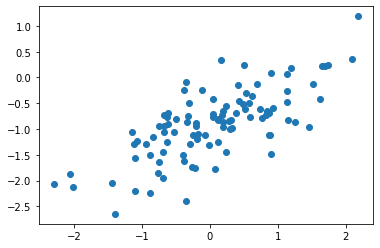

In [178]:
plt.scatter(X, y)

Plot shows linear positive relationship between X and y

In [179]:
model = sm.OLS(y, sm.add_constant(X)).fit()
print('RSE: ', RSE(model, sm.add_constant(X), y))
model.summary()

RSE:  0.4687911914418158


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           2.20e-17
Time:                        14:50:03   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.000      -1.020      -0.833
x1             0.5477      0.053     10.342      0.000       0.443       0.653
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression coefficients are very close to real values of betas. 95% confidence intervals contain real values. But R-squared value is unexpectedly low.

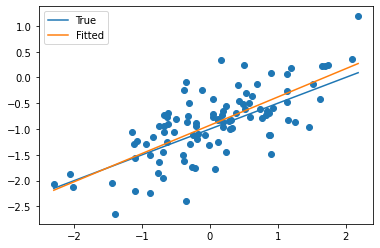

In [180]:
plt.scatter(X, - 1 + 0.5 * X + eps)
x = np.linspace(X.min(), X.max(), len(X))
plt.plot(x,  - 1 + 0.5 * x, label='True')
plt.plot(x,  model.params[0] + model.params[1] * x, label='Fitted')
plt.legend()

In [181]:
squared_X = X ** 2
sq_model = sm.OLS(y, sm.add_constant(np.array([X, squared_X]).T)).fit()
print('RSE: ', RSE(sq_model, sm.add_constant(np.array([X, squared_X]).T), y))
sq_model.summary()

RSE:  0.46871177203601855


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           2.83e-16
Time:                        14:50:03   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.000      -1.047      -0.818
x1             0.5468      0.053     10.229      0.000       0.441       0.653
x2             0.0077      0.043      0.181      0.856      -0.077       0.092
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

T-test for squared value of X results in very huge p-value, which tells that squared term doesn't related to y.

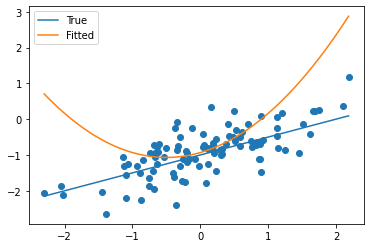

In [182]:
plt.scatter(X, - 1 + 0.5 * X + eps)
x = np.linspace(X.min(), X.max(), len(X))
plt.plot(x,  - 1 + 0.5 * x, label='True')
plt.plot(x,  sq_model.params[0] + sq_model.params[1] * x + sq_model.params[1] * x ** 2, label='Fitted')
plt.legend()

RSE:  0.09375823828836317


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2314.
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           5.58e-70
Time:                        14:50:05   Log-Likelihood:                 95.820
No. Observations:                 100   AIC:                            -187.6
Df Residuals:                      98   BIC:                            -182.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9853      0.009   -104.844      0.000      -1.004      -0.967
x1             0.5095      0.011     48.105      0.000       0.489       0.531
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

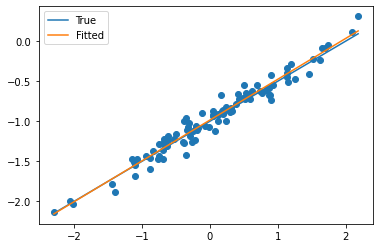

In [183]:
np.random.seed(1)
X = np.random.normal(size=100)
eps = np.random.normal(scale=0.1, size=100)
y = - 1 + 0.5 * X + eps

model2 = sm.OLS(y, sm.add_constant(X)).fit()
print('RSE: ', RSE(model2, sm.add_constant(X), y))

plt.scatter(X, - 1 + 0.5 * X + eps)
x = np.linspace(X.min(), X.max(), len(X))
plt.plot(x,  - 1 + 0.5 * x, label='True')
plt.plot(x,  model2.params[0] + model2.params[1] * x, label='Fitted')
plt.legend()

model2.summary()

Decrease of variance results in huge increase of R-squared value and also in decrease of RSE.

RSE:  0.09374235440720372


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1146.
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           3.32e-68
Time:                        14:50:07   Log-Likelihood:                 95.837
No. Observations:                 100   AIC:                            -185.7
Df Residuals:                      97   BIC:                            -177.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9865      0.012    -85.468      0.000      -1.009      -0.964
x1             0.5094      0.011     47.642      0.000       0.488       0.531
x2             0.0015      0.009      0.181      0.856      -0.015       0.018
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

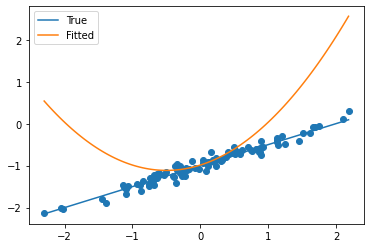

In [184]:
squared_X = X ** 2
sq_model2 = sm.OLS(y, sm.add_constant(np.array([X, squared_X]).T)).fit()
print('RSE: ', RSE(sq_model2, sm.add_constant(np.array([X, squared_X]).T), y))


plt.scatter(X, - 1 + 0.5 * X + eps)
x = np.linspace(X.min(), X.max(), len(X))
plt.plot(x,  - 1 + 0.5 * x, label='True')
plt.plot(x,  sq_model2.params[0] + sq_model2.params[1] * x + sq_model2.params[1] * x ** 2, label='Fitted')
plt.legend()

sq_model2.summary()

Difference between regressions with squared term and without are almost equal for data with different variance.

RSE:  0.8438241445952684


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     37.77
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           1.72e-08
Time:                        14:54:19   Log-Likelihood:                -123.90
No. Observations:                 100   AIC:                             251.8
Df Residuals:                      98   BIC:                             257.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8677      0.085    -10.259      0.000      -1.036      -0.700
x1             0.5859      0.095      6.146      0.000       0.397       0.775
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

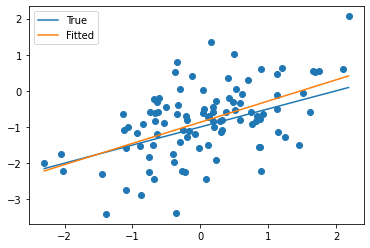

In [185]:
np.random.seed(1)
X = np.random.normal(size=100)
eps = np.random.normal(scale=0.9, size=100)
y = - 1 + 0.5 * X + eps

model3 = sm.OLS(y, sm.add_constant(X)).fit()
print('RSE: ', RSE(model3, sm.add_constant(X), y))

plt.scatter(X, - 1 + 0.5 * X + eps)
x = np.linspace(X.min(), X.max(), len(X))
plt.plot(x,  - 1 + 0.5 * x, label='True')
plt.plot(x,  model3.params[0] + model3.params[1] * x, label='Fitted')
plt.legend()

model3.summary()

Plots show that model estimates population regression very good, but due to big data in variance R-squared decreased and RSE increased.

RSE:  0.8436811896648333


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     18.72
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           1.34e-07
Time:                        14:57:55   Log-Likelihood:                -123.89
No. Observations:                 100   AIC:                             253.8
Df Residuals:                      97   BIC:                             261.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8785      0.104     -8.457      0.000      -1.085      -0.672
x1             0.5843      0.096      6.072      0.000       0.393       0.775
x2             0.0139      0.077      0.181      0.856      -0.138       0.166
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

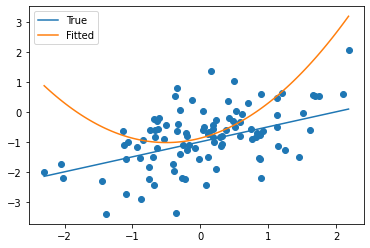

In [186]:
squared_X = X ** 2
sq_model3 = sm.OLS(y, sm.add_constant(np.array([X, squared_X]).T)).fit()
print('RSE: ', RSE(sq_model3, sm.add_constant(np.array([X, squared_X]).T), y))


plt.scatter(X, - 1 + 0.5 * X + eps)
x = np.linspace(X.min(), X.max(), len(X))
plt.plot(x,  - 1 + 0.5 * x, label='True')
plt.plot(x,  sq_model3.params[0] + sq_model3.params[1] * x + sq_model3.params[1] * x ** 2, label='Fitted')
plt.legend()

sq_model3.summary()

Squared model still doesn't give any influence in variance explanation.

In [192]:
pd.DataFrame({
    'B0': [np.round(model.conf_int()[0], 4), np.round(model2.conf_int()[0], 4), np.round(model3.conf_int()[0], 4)],
    'B1': [np.round(model.conf_int()[1], 4), np.round(model2.conf_int()[1], 4), np.round(model3.conf_int()[1], 4)],
}, index=['Base model', 'Less variance', 'More variance'])

,B0,B1
Base model,"[-1.0197, -0.8332]","[0.4426, 0.6528]"
Less variance,"[-1.0039, -0.9666]","[0.4885, 0.5306]"
More variance,"[-1.0355, -0.6998]","[0.3967, 0.7751]"


It's seen that he less variance is present in data, the smaller confidence intervals has corresponding regression model. Also all intervals are centered near same value.

# Ex. 14

In [255]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(scale=0.1, size=100)
eps = np.random.normal(scale=1, size=100)
y = 2 + 2 * x1 + 0.3 * x2 + eps

array([[1.        , 0.83905962],
       [0.83905962, 1.        ]])

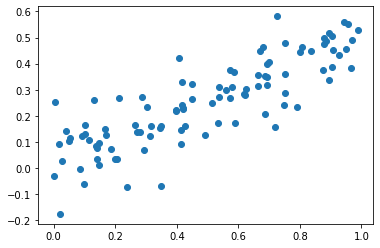

In [256]:
plt.scatter(x1, x2)
np.corrcoef(x1, x2)

In [257]:
model = sm.OLS(y, sm.add_constant(np.array([x1, x2]).T)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           4.40e-07
Time:                        16:35:30   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

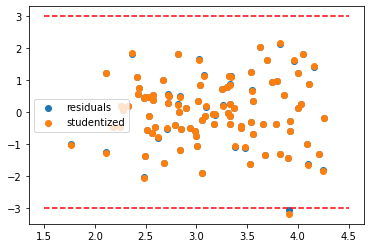

In [258]:
#plt.figure(figsize=(10, 8))
line = np.linspace(1.5, 4.5, 100)

predictions = model.predict(sm.add_constant(np.array([x1, x2]).T))
residuals = y - predictions
studentized = model.get_influence().resid_studentized_external

plt.scatter(predictions, residuals, label='residuals')
plt.scatter(predictions, studentized, label='studentized')
plt.legend()
plt.plot(line, np.full(line.shape, 3), 'r--')
plt.plot(line, np.full(line.shape, -3), 'r--')

Model coefficient are far from real. Also b1 has large p-value. Null-hypothesis for b2 is rejected. p-value for b2 is not very big but suspicious anyway.

In [259]:
model2 = sm.OLS(y, sm.add_constant(x1)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           6.68e-07
Time:                        16:35:32   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now it is clearly seen that null-hypothesis for b1 can be rejected. Also coefficient itself is now much closer to real value of b1.

In [260]:
model3 = sm.OLS(y, sm.add_constant(x2)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           1.09e-07
Time:                        16:35:33   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.000       1.895       2.636
x1             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now p-value for b2 is very low and it clearly seen that can reject null-hypothesis. But the coefficient is now much farther from real value of b2.

Such a results contradict each other. Model with both variables tells that variable x1 is insignificant in presence of x2, but it very significant when single. Also coefficients in different models are very different between each other.

In [261]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

In [262]:
model4 = sm.OLS(y, sm.add_constant(np.array([x1, x2]).T)).fit()
model5 = sm.OLS(y, sm.add_constant(x1)).fit()
model6 = sm.OLS(y, sm.add_constant(x2)).fit()

In [263]:
model.params, model4.params

(array([2.1892844 , 0.70462854, 2.50240496]),
 array([2.19957502, 0.22002609, 3.43918761]))

In [264]:
model2.params, model5.params

(array([2.2485807 , 1.87698651]), array([2.3583255 , 1.72252265]))

In [265]:
model3.params, model6.params

(array([2.26552605, 3.56127637]), array([2.23312681, 3.72160649]))

Model with both variables now has much different coefficients. Other models did not change a lot.

100

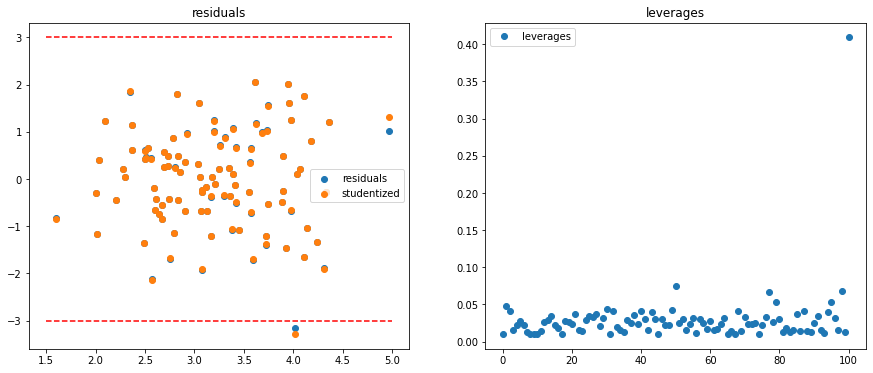

In [282]:
#plt.figure(figsize=(10, 8))
line = np.linspace(1.5, 5, 100)
_, axes = plt.subplots(1, 2, figsize=(15, 6))

predictions = model4.predict(sm.add_constant(np.array([x1, x2]).T))
residuals = y - predictions
studentized = model4.get_influence().resid_studentized_external

axes[0].scatter(predictions, residuals, label='residuals')
axes[0].scatter(predictions, studentized, label='studentized')
axes[0].legend()
axes[0].set_title('residuals')
axes[0].plot(line, np.full(line.shape, 3), 'r--')
axes[0].plot(line, np.full(line.shape, -3), 'r--')

hat_values = model4.get_influence().hat_matrix_diag
axes[1].plot(hat_values, 'o', label='leverages')
axes[1].legend()
axes[1].set_title('leverages')
hat_values.argmax()

40

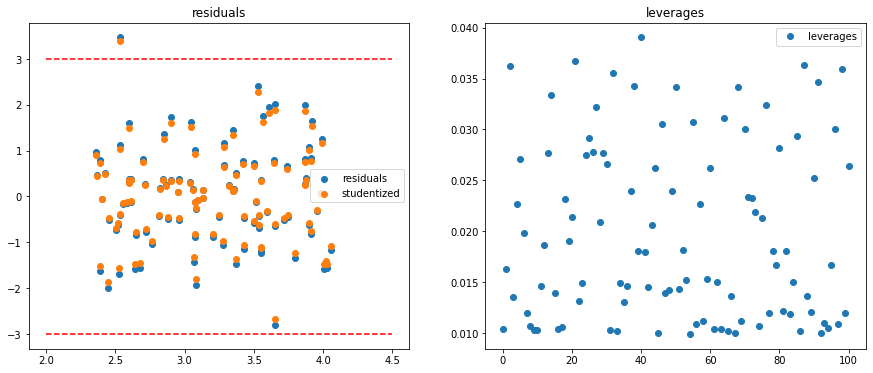

In [284]:
#plt.figure(figsize=(10, 8))
line = np.linspace(2, 4.5, 100)
_, axes = plt.subplots(1, 2, figsize=(15, 6))

predictions = model5.predict(sm.add_constant(x1))
residuals = y - predictions
studentized = model5.get_influence().resid_studentized_external

axes[0].scatter(predictions, residuals, label='residuals')
axes[0].scatter(predictions, studentized, label='studentized')
axes[0].legend()
axes[0].set_title('residuals')
axes[0].plot(line, np.full(line.shape, 3), 'r--')
axes[0].plot(line, np.full(line.shape, -3), 'r--')

hat_values = model5.get_influence().hat_matrix_diag
axes[1].plot(hat_values, 'o', label='leverages')
axes[1].legend()
axes[1].set_title('leverages')
hat_values.argmax()

100

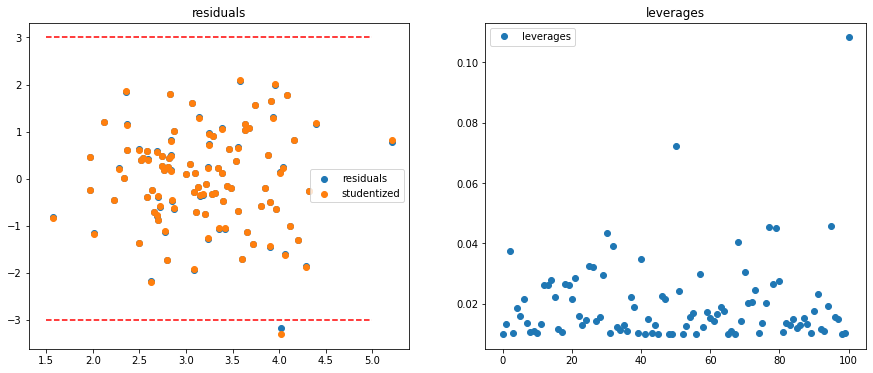

In [289]:
#plt.figure(figsize=(10, 8))
line = np.linspace(1.5, 5, 100)
_, axes = plt.subplots(1, 2, figsize=(15, 6))

predictions = model6.predict(sm.add_constant(x2))
residuals = y - predictions
studentized = model6.get_influence().resid_studentized_external

axes[0].scatter(predictions, residuals, label='residuals')
axes[0].scatter(predictions, studentized, label='studentized')
axes[0].legend()
axes[0].set_title('residuals')
axes[0].plot(line, np.full(line.shape, 3), 'r--')
axes[0].plot(line, np.full(line.shape, -3), 'r--')

hat_values = model6.get_influence().hat_matrix_diag
axes[1].plot(hat_values, 'o', label='leverages')
axes[1].legend()
axes[1].set_title('leverages')
hat_values.argmax()

Plots show that new observation is high-leverage in first and third models, although it is not an outlier in any of them.

# Ex. 15

In [316]:
dataset_file = '../datasets/Boston.csv'
data = pd.read_csv(dataset_file, index_col=0)
print(data.dtypes)
print(data.shape)
data.head()

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object
(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [295]:
data.loc[data.isna().any(axis=1)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


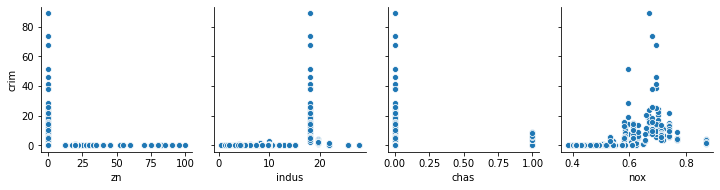

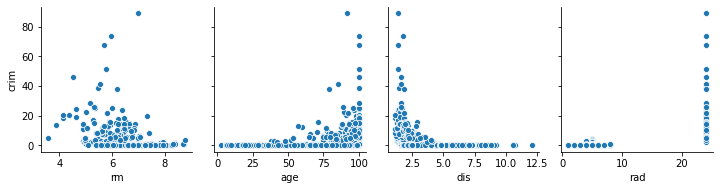

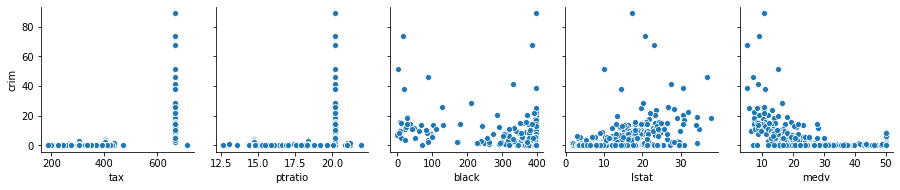

In [319]:
sns.pairplot(data, y_vars='crim', x_vars=data.columns[1:5])
sns.pairplot(data, y_vars='crim', x_vars=data.columns[5:9])
sns.pairplot(data, y_vars='crim', x_vars=data.columns[9:])

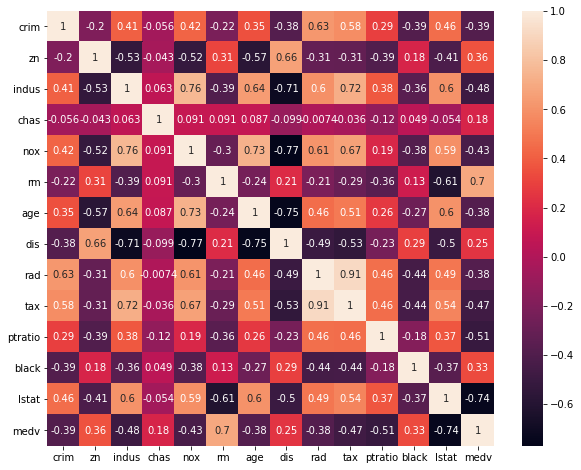

In [320]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)

In [307]:
def test_predictor(predictor_name):
    y = data.crim
    x = data[predictor_name]
    model = sm.OLS(y, sm.add_constant(x)).fit()
    print(predictor_name)
    print(f'T-value: {model.tvalues[1]:.2f} p-value: {model.pvalues[1]:.4f}')
    print(f'R-squared: {model.rsquared:.3f}')
    print(f'RSE: {RSE(model, sm.add_constant(x), y):.3f}')
    print()

In [309]:
for col in data.columns:
    test_predictor(col)

crim
T-value: 27005814454335192.00 p-value: 0.0000
R-squared: 1.000
RSE: 0.000

zn
T-value: -4.59 p-value: 0.0000
R-squared: 0.040
RSE: 8.435

indus
T-value: 9.99 p-value: 0.0000
R-squared: 0.165
RSE: 7.866

chas
T-value: -1.26 p-value: 0.2094
R-squared: 0.003
RSE: 8.597

nox
T-value: 10.42 p-value: 0.0000
R-squared: 0.177
RSE: 7.810

rm
T-value: -5.04 p-value: 0.0000
R-squared: 0.048
RSE: 8.401

age
T-value: 8.46 p-value: 0.0000
R-squared: 0.124
RSE: 8.057

dis
T-value: -9.21 p-value: 0.0000
R-squared: 0.144
RSE: 7.965

rad
T-value: 18.00 p-value: 0.0000
R-squared: 0.391
RSE: 6.718

tax
T-value: 16.10 p-value: 0.0000
R-squared: 0.340
RSE: 6.997

ptratio
T-value: 6.80 p-value: 0.0000
R-squared: 0.084
RSE: 8.240

black
T-value: -9.37 p-value: 0.0000
R-squared: 0.148
RSE: 7.946

lstat
T-value: 11.49 p-value: 0.0000
R-squared: 0.208
RSE: 7.664

medv
T-value: -9.46 p-value: 0.0000
R-squared: 0.151
RSE: 7.934



It appears that only `chas` variable's null-hypothesis cannot be rejected. All other variables are statistically significant. Correlation between `chas` and `crim` is near to 0, which is another evidence of absence of relationship between them.  
Biggest R-squared values have `rad`, `tax` and `lstat` variables.

In [323]:
multi_model = sm.OLS(data.crim, sm.add_constant(data.drop(['crim'], axis=1))).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           1.57e-56
Time:                        17:48:35   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model results show several big p-values. This fact and correlation plot suggest that there is a lot of multicollinearity between variables.  
"Usless" predictors: `indus`, `chas`, `nox`, `rm`, `age`, `tax`, `ptratio`, `lstat`. For all other null-hypothesis can be rejected.

Comparing single models to multiple one, it is seen that a that "best" predictors became unsignificant in presence of other.